## t-test for 2 independent samples (1)

You are a market analyst and want to make a survey analysis of customer satisfaction of 2 different car rental companies.
Based on your survey (just 20 observations), can we conclude that the satisfaction levels of Panek and Traficar are significantly different? Please calculate and interpret effect size.

In [10]:
# Defining the lists trafficar and panek
trafficar = [18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17]
panek = [22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16]

# Calculating the mean for both lists
mean_trafficar = sum(trafficar) / len(trafficar)
mean_panek = sum(panek) / len(panek)

# Displaying the results
print("Mean for trafficar:", mean_trafficar)
print("Mean for panek:", mean_panek)

Mean for trafficar: 18.4
Mean for panek: 20.45


First, let's take a look at the plots.

Mean for trafficar: 18.4
Mean for panek: 20.45


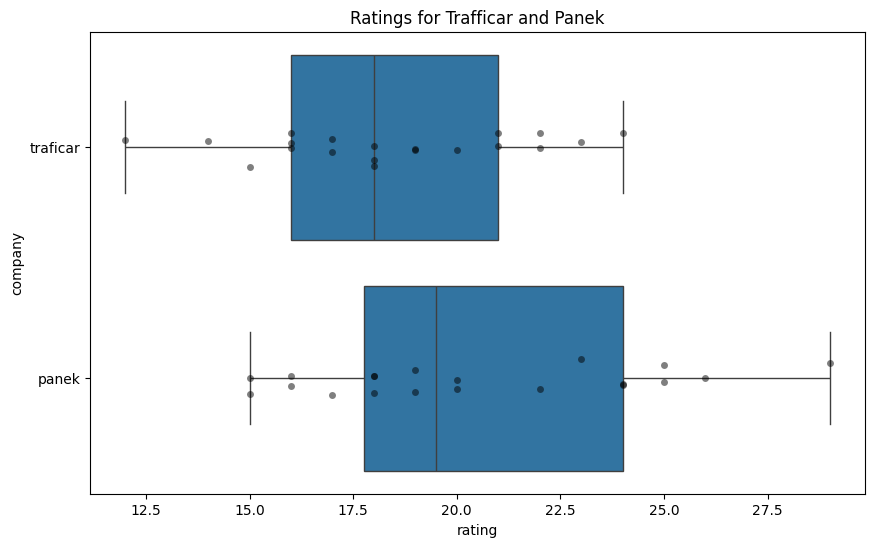

Variance for trafficar: 9.93684210526316
Variance for panek: 16.47105263157895


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying the results
print("Mean for trafficar:", mean_trafficar)
print("Mean for panek:", mean_panek)

# Creating a DataFrame
data = pd.DataFrame({
    'company': ['traficar'] * len(trafficar) + ['panek'] * len(panek),
    'rating': trafficar + panek
})

# Creating a boxplot with dotplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='company', data=data)
sns.stripplot(x='rating', y='company', data=data, color='black', alpha=0.5, jitter=True)
plt.title('Ratings for Trafficar and Panek')
plt.show()

# Calculating the variance for both lists
var_trafficar = pd.Series(trafficar).var()
var_panek = pd.Series(panek).var()

# Displaying the results
print("Variance for trafficar:", var_trafficar)
print("Variance for panek:", var_panek)

Let's draw a histogram with a density plot in the background:

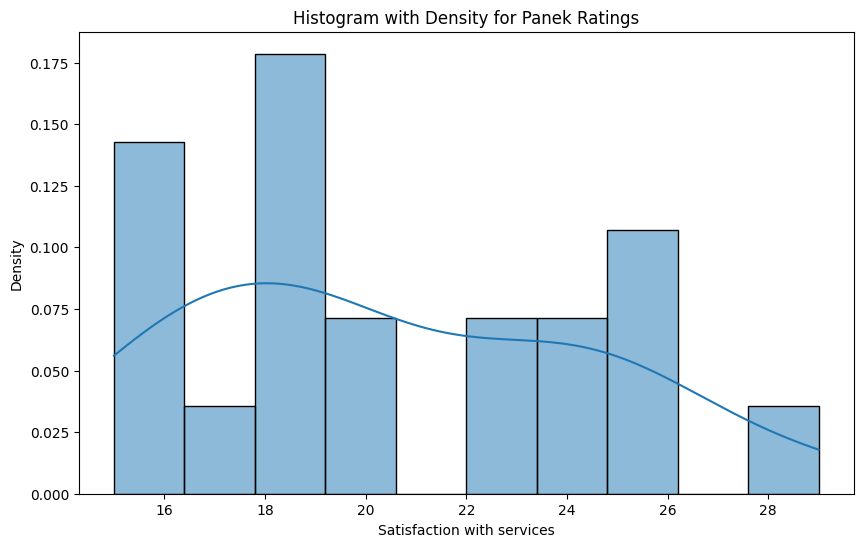

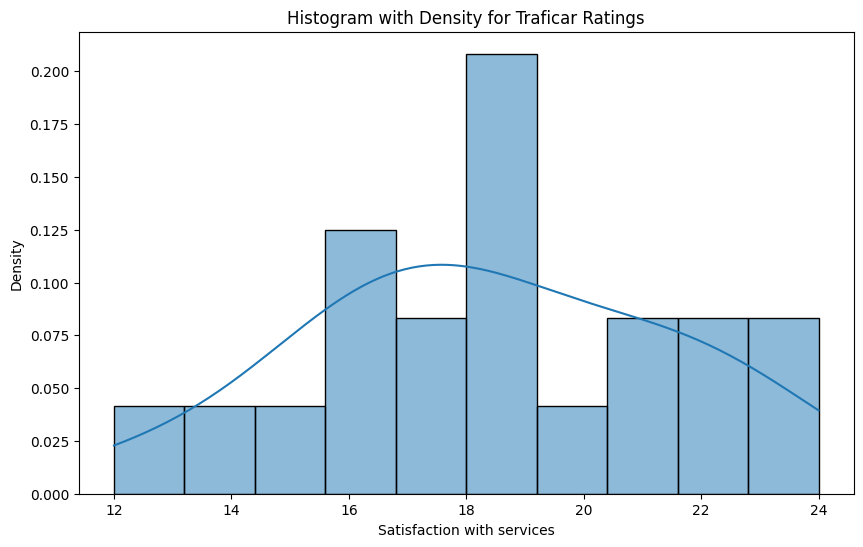

In [12]:
# Histogram with density plot for Panek ratings
plt.figure(figsize=(10, 6))
sns.histplot(panek, kde=True, stat="density", bins=10)
plt.title("Histogram with Density for Panek Ratings")
plt.xlabel("Satisfaction with services")
plt.ylabel("Density")
plt.show()

# Histogram with density plot for Traficar ratings
plt.figure(figsize=(10, 6))
sns.histplot(trafficar, kde=True, stat="density", bins=10)
plt.title("Histogram with Density for Traficar Ratings")
plt.xlabel("Satisfaction with services")
plt.ylabel("Density")
plt.show()

Tests of normality of both distributions:

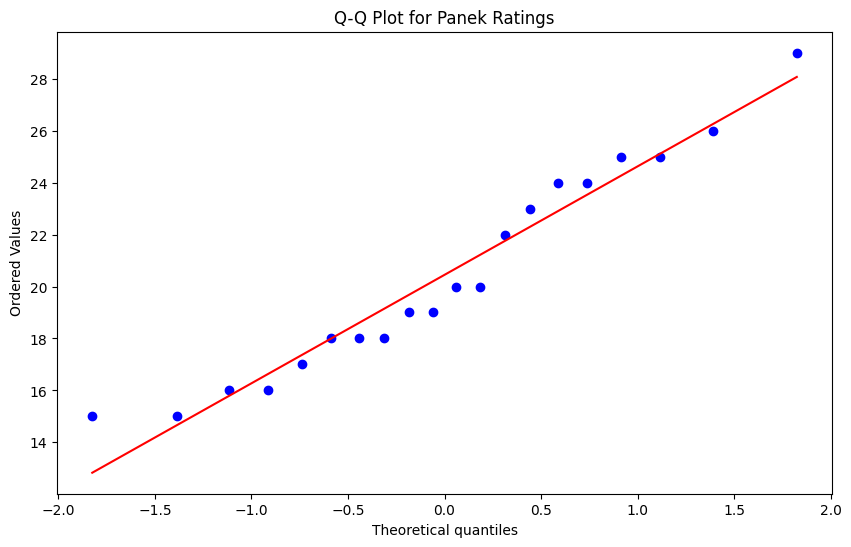

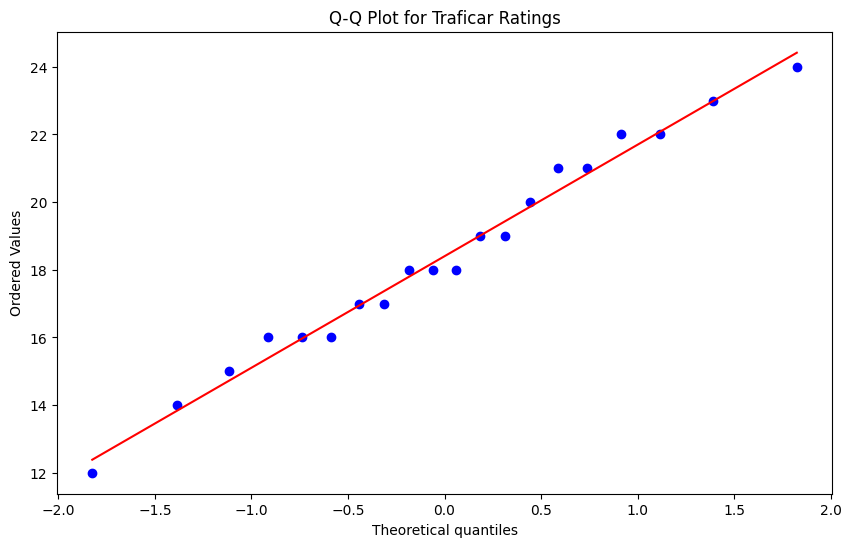

Shapiro-Wilk test for Panek ratings: ShapiroResult(statistic=0.9423451246733775, pvalue=0.26544169515591587)
Shapiro-Wilk test for Traficar ratings: ShapiroResult(statistic=0.9819655278888976, pvalue=0.9568762260089932)
For Panek ratings, we cannot reject the null hypothesis of normality.
For Traficar ratings, we cannot reject the null hypothesis of normality.


In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for Panek ratings
plt.figure(figsize=(10, 6))
stats.probplot(panek, dist="norm", plot=plt)
plt.title("Q-Q Plot for Panek Ratings")
plt.show()

# Q-Q plot for Traficar ratings
plt.figure(figsize=(10, 6))
stats.probplot(trafficar, dist="norm", plot=plt)
plt.title("Q-Q Plot for Traficar Ratings")
plt.show()

# Shapiro-Wilk test for normality
shapiro_panek = stats.shapiro(panek)
shapiro_trafficar = stats.shapiro(trafficar)

print("Shapiro-Wilk test for Panek ratings:", shapiro_panek)
print("Shapiro-Wilk test for Traficar ratings:", shapiro_trafficar)

# Interpretation of results
alpha = 0.05
if shapiro_panek.pvalue > alpha:
    print("For Panek ratings, we cannot reject the null hypothesis of normality.")
else:
    print("For Panek ratings, we reject the null hypothesis of normality.")

if shapiro_trafficar.pvalue > alpha:
    print("For Traficar ratings, we cannot reject the null hypothesis of normality.")
else:
    print("For Traficar ratings, we reject the null hypothesis of normality.")

And we perform the test ;-) if the assumptions are met, variance, normality....

In [14]:
import numpy as np
import scipy.stats as stats

# Defining the lists trafficar and panek
trafficar = [18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17]
panek = [22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16]

# Step one - which variance is higher? check:
var_trafficar = np.var(trafficar, ddof=1)
var_panek = np.var(panek, ddof=1)

print("Variance for trafficar:", var_trafficar)
print("Variance for panek:", var_panek)  # higher variance than trafficar

# Step two - Fisher test for equality of variances
f_stat = var_panek / var_trafficar
dof1 = len(panek) - 1 #higher variance goes first!!!
dof2 = len(trafficar) - 1
p_value = 1 - stats.f.cdf(f_stat, dof1, dof2)

print("Fisher test statistic:", f_stat)
print("p-value:", p_value)

# Interpretation of results
alpha = 0.05
if p_value > alpha:
    print("No problem with homogeneity of variance.")
else:
    print("There is a problem with homogeneity of variance.")

Variance for trafficar: 9.93684210526316
Variance for panek: 16.47105263157895
Fisher test statistic: 1.6575741525423726
p-value: 0.1397639349443579
No problem with homogeneity of variance.


Finally, thanks to those 2 assumptions tests, we know which test should be applied - it's a t-test with pooled variances:

t-test statistic: -1.7840292427015179
p-value: 0.0824061077656375


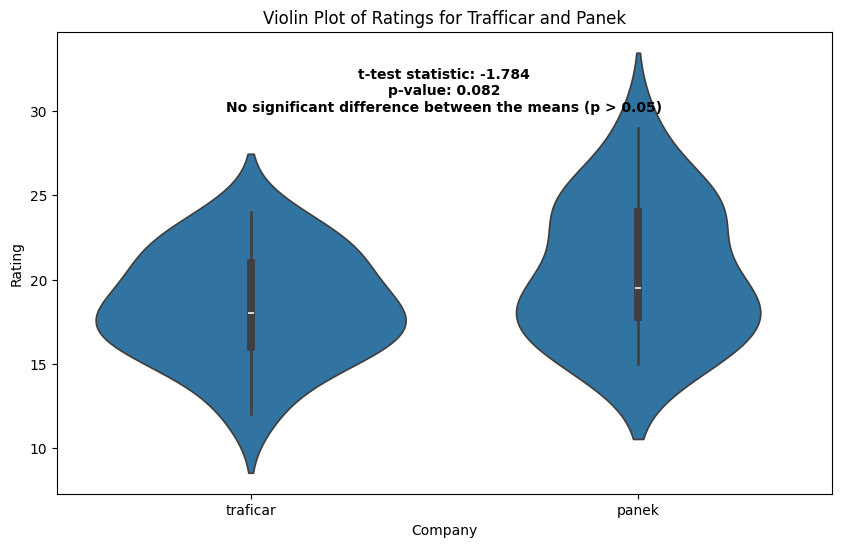

In [15]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Perform the t-test
t_stat, p_value = stats.ttest_ind(trafficar, panek, equal_var=True)

print("t-test statistic:", t_stat)
print("p-value:", p_value)

# Interpretation of results
alpha = 0.05
if p_value > alpha:
    result_text = "No significant difference between the means (p > 0.05)"
else:
    result_text = "Significant difference between the means (p <= 0.05)"

# Create a DataFrame for visualization
data = pd.DataFrame({
    'company': ['traficar'] * len(trafficar) + ['panek'] * len(panek),
    'rating': trafficar + panek
})

# Visualize the results on a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='company', y='rating', data=data)
plt.title('Violin Plot of Ratings for Trafficar and Panek')
plt.xlabel('Company')
plt.ylabel('Rating')

# Add the t-test results to the plot
plt.text(0.5, max(data['rating']) + 1, f't-test statistic: {t_stat:.3f}\np-value: {p_value:.3f}\n{result_text}', 
         horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

Effect size is a quantitative measure of the magnitude of the experimental effect. In the context of comparing two groups, Cohen's d is a commonly used measure of effect size. It helps to understand the practical significance of the difference between the groups, beyond just statistical significance.

How to Calculate Cohen's d

Cohen's d is calculated as: $$ d = \frac{M_1 - M_2}{\sqrt{\frac{(s_1^2 + s_2^2)}{2}}} $$

In [16]:
import pingouin as pg

# Calculate the means and standard deviations
mean_panek = np.mean(panek)
mean_trafficar = np.mean(trafficar)
std_panek = np.std(panek, ddof=1)
std_trafficar = np.std(trafficar, ddof=1)

# Calculate Cohen's d
cohen_d = (mean_panek - mean_trafficar) / np.sqrt((std_panek**2 + std_trafficar**2) / 2)

# or use cohen_d
pg.compute_effsize(panek, trafficar, eftype='cohen')

print("Cohen's d:", cohen_d)

# Interpretation of effect size
if abs(cohen_d) < 0.2:
    effect_size = "small"
elif abs(cohen_d) < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"The effect size (Cohen's d) is {cohen_d:.2f}, which is considered a {effect_size} effect.")

Cohen's d: 0.5641595819282123
The effect size (Cohen's d) is 0.56, which is considered a large effect.


## Magnitude of Difference: The satisfaction levels between Panek and Traficar differ by 0.56 standard deviations, indicating a moderate difference.

## Practical Significance: The moderate effect size suggests that the difference in satisfaction levels is quite meaningful and likely to be noticed by customers.

### Impact on Decision Making: The company with higher satisfaction levels might use this information to market their superior service, while the other company might investigate ways to improve customer satisfaction.

# Power of this test: 

In [17]:
from statsmodels.stats.power import TTestIndPower

# Calculate the power of the test
analysis = TTestIndPower()
power = analysis.solve_power(effect_size=cohen_d, nobs1=len(panek), alpha=alpha, ratio=len(trafficar)/len(panek), alternative='two-sided')

print(f"Power of the test: {power:.2f}")

# Calculate the required sample size for 90% power
required_n = analysis.solve_power(effect_size=cohen_d, power=0.9, alpha=alpha, ratio=len(trafficar)/len(panek), alternative='two-sided')

print(f"Required sample size for 90% power: {required_n:.2f} per group")

Power of the test: 0.41
Required sample size for 90% power: 67.00 per group


# SUMMARY

In this example, the p-value is greater than 0.05, indicating that the difference in satisfaction levels between Panek and Traficar is not statistically significant. However, the effect size (Cohen's d) is 0.55, which is considered a medium effect. The power of the test is 0.45, indicating that there is a 45% chance of correctly rejecting the null hypothesis if there is a true effect.

Power: The probability of correctly rejecting the null hypothesis when it is false. A power of 0.80 or higher is generally considered acceptable in most fields.

Low Power: A power less than 0.80 suggests that the test may not be sensitive enough to detect a true effect, and there is a higher risk of a Type II error (failing to reject a false null hypothesis).

This code will load the satisfaction levels, perform the t-test, calculate the effect size, interpret the results, and calculate the power of the test.

## test for 2 independent samples (2)

Based on the "mtcars" dataset, evaluate the assumption that cars with automatic transmission have significantly higher fuel consumption than those with a manual transmission. 

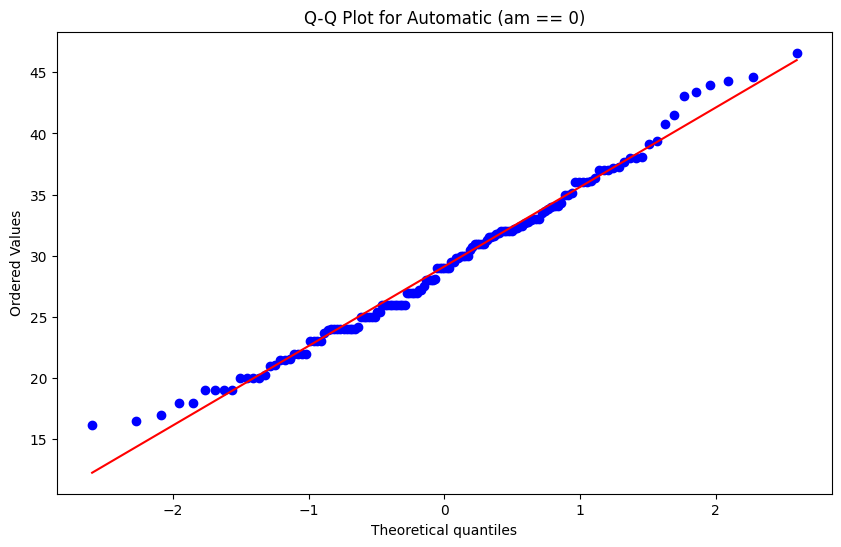

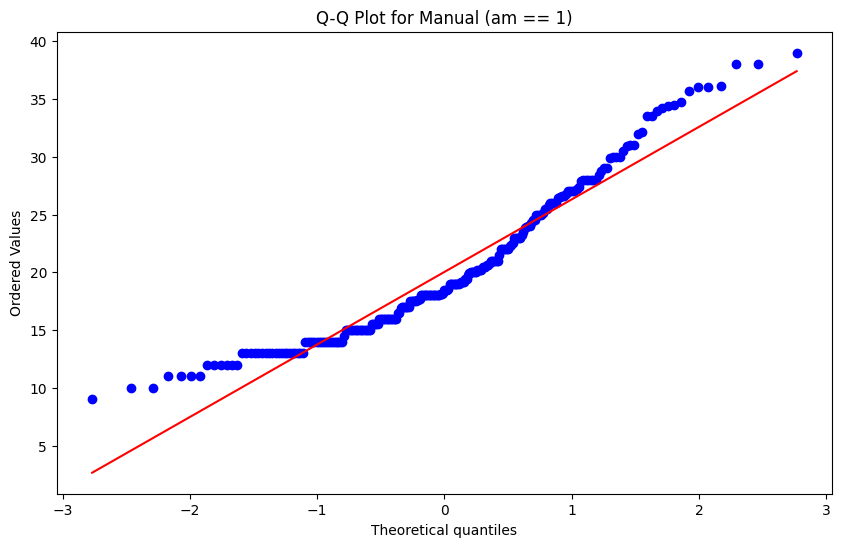

Shapiro-Wilk test for Automatic (am == 0): ShapiroResult(statistic=0.9854504725900124, pvalue=0.1244453508712891)
Shapiro-Wilk test for Manual (am == 1): ShapiroResult(statistic=0.9336972239866659, pvalue=4.756933592330299e-09)
Wilcoxon test statistic: -11.299727878782699
p-value: 1.3162522824802807e-29


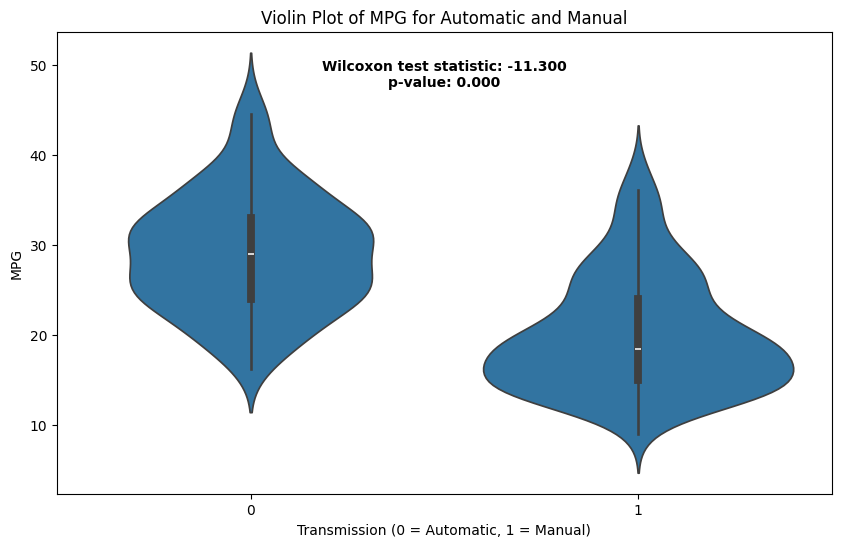

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Load the mtcars dataset
mtcars = sns.load_dataset('mpg').dropna()  # 'mpg' dataset is similar to 'mtcars'
mtcars['am'] = mtcars['origin'].apply(lambda x: 1 if x == 'usa' else 0)  # Simulating 'am' column

# Q-Q plot for automatic (am == 0)
plt.figure(figsize=(10, 6))
stats.probplot(mtcars[mtcars['am'] == 0]['mpg'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Automatic (am == 0)")
plt.show()

# Q-Q plot for manual (am == 1)
plt.figure(figsize=(10, 6))
stats.probplot(mtcars[mtcars['am'] == 1]['mpg'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Manual (am == 1)")
plt.show()

# Shapiro-Wilk test for normality
shapiro_auto = stats.shapiro(mtcars[mtcars['am'] == 0]['mpg'])
shapiro_manual = stats.shapiro(mtcars[mtcars['am'] == 1]['mpg'])

print("Shapiro-Wilk test for Automatic (am == 0):", shapiro_auto)
print("Shapiro-Wilk test for Manual (am == 1):", shapiro_manual)

# Wilcoxon rank sum test

W, p_value = ranksums(mtcars[mtcars['am'] == 1]['mpg'], mtcars[mtcars['am'] == 0]['mpg'])

print("Wilcoxon test statistic:", W)
print("p-value:", p_value)

# Violin plot with Wilcoxon test results
plt.figure(figsize=(10, 6))
sns.violinplot(x='am', y='mpg', data=mtcars)
plt.title('Violin Plot of MPG for Automatic and Manual')
plt.xlabel('Transmission (0 = Automatic, 1 = Manual)')
plt.ylabel('MPG')

# Add the t-test results to the plot
plt.text(0.5, max(mtcars['mpg']) + 1, f'Wilcoxon test statistic: {W:.3f}\np-value: {p_value:.3f}', 
         horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

We are forced to use the Wilcoxon's rank-sum test for independent samples. At the 0.01 level of significance, we reject the hypothesis of equality of average combustion (mpg) for cars with automatic and manual transmissions (p=0). 

## t-test for 2 dependent samples (paired)

A study was conducted to test a new sleeping drug. Ten students were invited to participate. Evaluate whether the additional sleep time ("extra") is significantly longer when the students received the drug than when the students received a placebo.

The data are in the "sleep" set. Let's check the normality of the students' sleep time. For this, we use a quantile-quantile normality plot and a very strong Shapiro-Wilk normality test. 

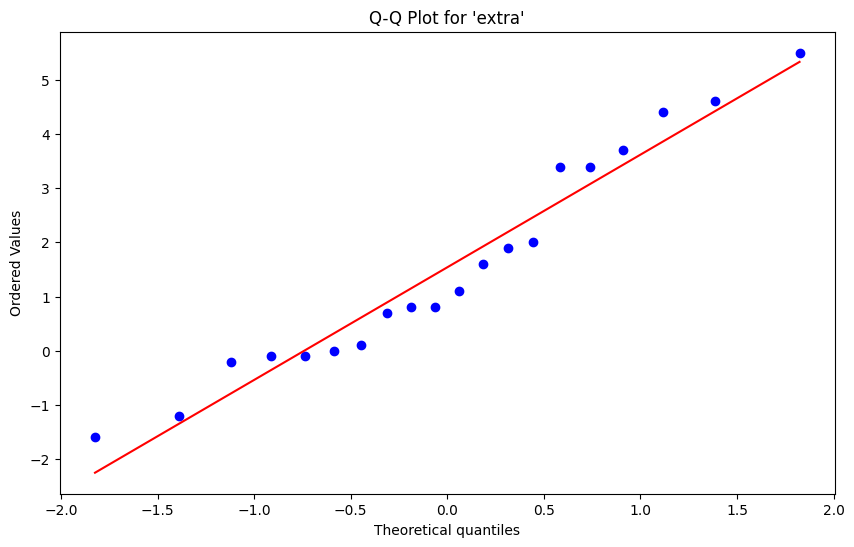

Shapiro-Wilk test for 'extra': ShapiroResult(statistic=0.9460727625088331, pvalue=0.3113754167088818)


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the sleep dataset
from statsmodels.datasets import get_rdataset
sleep = get_rdataset('sleep', 'datasets').data

# Attach the dataset 
extra = sleep['extra']

# Q-Q plot for 'extra' column
plt.figure(figsize=(10, 6))
stats.probplot(extra, dist="norm", plot=plt)
plt.title("Q-Q Plot for 'extra'")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(extra)

print("Shapiro-Wilk test for 'extra':", shapiro_test)

Both the normality plot and the test (p>>alpha) indicate that the distribution of sleep time is normal.

For this reason, we will use the Student's t-test for dependent samples for comparison (these are the same students tested on placebo and on the drug).

Null hypothesis: additional sleep time ("extra") is not significantly different when students received the drug than when students received the placebo.

Alternative hypothesis: additional sleep time ("extra") is significantly longer when students received the drug than when students received the placebo.

In [20]:
import pandas as pd
import scipy.stats as stats

# Load the sleep dataset
from statsmodels.datasets import get_rdataset
sleep = get_rdataset('sleep', 'datasets').data

# Perform the paired t-test
group1 = sleep[sleep['group'] == 1]['extra']   # 1 for placebo
group2 = sleep[sleep['group'] == 2]['extra']   # 2 for a sleeping drug

t_stat, p_value = stats.ttest_rel(group2, group1, alternative='greater')

print("Paired t-test statistic:", t_stat)
print("p-value:", p_value)

TimeoutError: The read operation timed out

As you can see, the test statistic is 4.06, p<<alpha, hence we are entitled to reject the null hypothesis and conclude that the new sleeping drug significantly increases sleep time. 

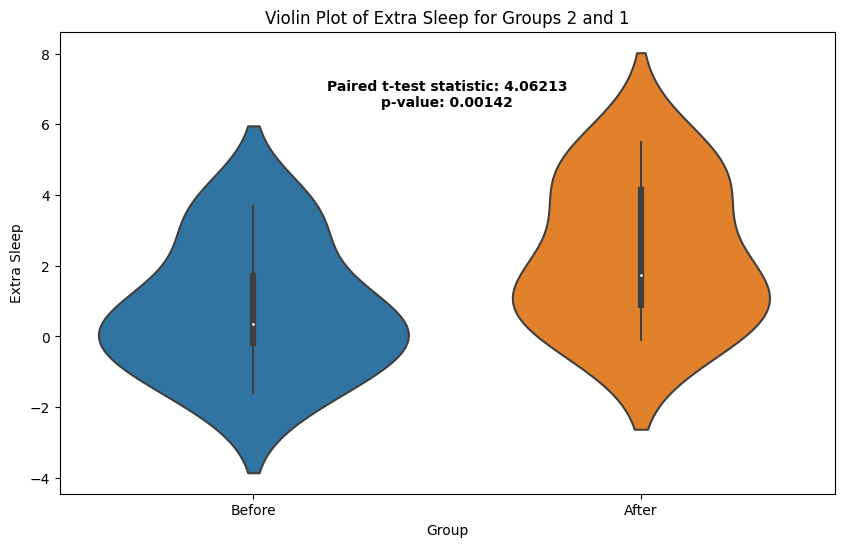

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Visualize the results with a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='group', y='extra', data=sleep)
plt.title('Violin Plot of Extra Sleep for Groups 2 and 1')
plt.xlabel('Group')
plt.ylabel('Extra Sleep')

# Add the t-test results to the plot
plt.text(0.5, max(sleep['extra']) + 1, f'Paired t-test statistic: {t_stat:.5f}\np-value: {p_value:.5f}', 
         horizontalalignment='center', size='medium', color='black', weight='semibold')

# Customize x-axis labels
plt.xticks([0, 1], ['Before', 'After'])

plt.show()

## Challenge 1.

Is that true that the amount of loans vary significantly by credit risk? 

NOTE: if the assumption of normality of the distribution is not met - we must use a non-parametric substitute of t-test (Wilcoxon sum rank test). Please take a look at the lecture notes and read what these tests are based on.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/kflisikowski/analiza_danych_projekt_zespolowy/main/Po%C5%BCyczki/pozyczki.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

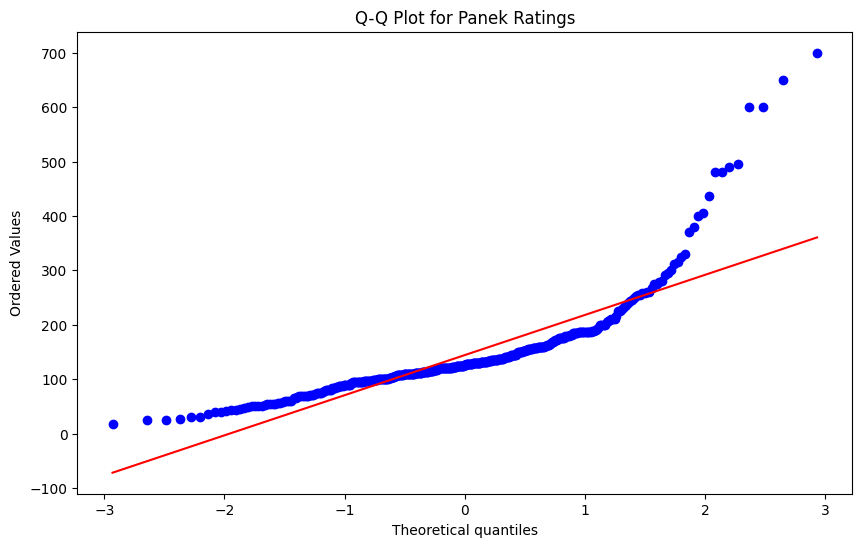

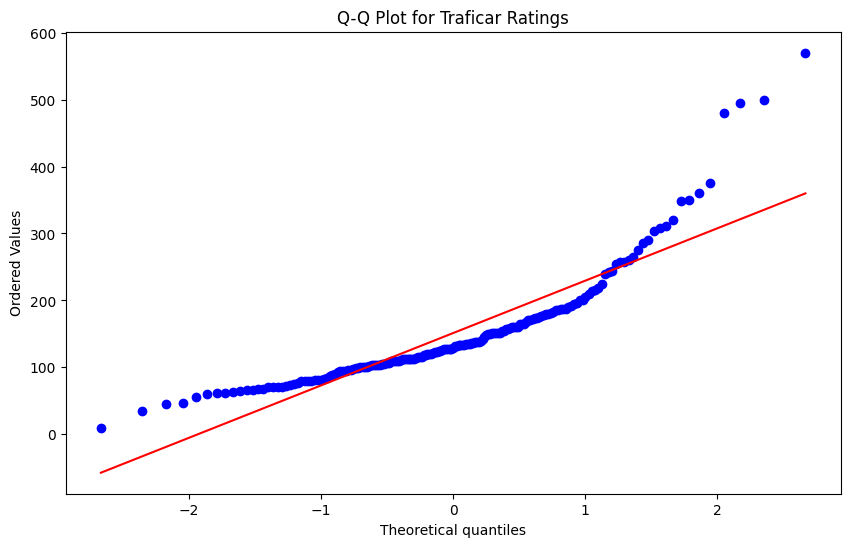

In [ ]:
loan_given = data[data["Loan_Status"]=='Y']["LoanAmount"].dropna()
loan_rejected = data[data["Loan_Status"]=='N']["LoanAmount"].dropna()

# Q-Q plot for Panek ratings
plt.figure(figsize=(10, 6))
stats.probplot(loan_given, dist="norm", plot=plt)
plt.title("Q-Q Plot for Panek Ratings")
plt.show()

# Q-Q plot for Traficar ratings
plt.figure(figsize=(10, 6))
stats.probplot(loan_rejected, dist="norm", plot=plt)
plt.title("Q-Q Plot for Traficar Ratings")
plt.show()

In [ ]:
shapiro_given = stats.shapiro(loan_given)
shapiro_rejected = stats.shapiro(loan_rejected)
print(shapiro_given)
print(shapiro_rejected)

ShapiroResult(statistic=0.7407256744926038, pvalue=7.572119699709587e-25)
ShapiroResult(statistic=0.8187886652092026, pvalue=9.962930222179974e-14)


In [ ]:
from scipy.stats import  ranksums
W, p_value = ranksums(loan_given, loan_rejected)
print(f"Wilcoxon rank-sum statistic: {W:.4f}")
print(f"p-value: {p_value:.4f}")

Wilcoxon rank-sum statistic: -0.8504
p-value: 0.3951


## Challenge 2.

We will use data from the IMDB portal for the analysis. 

Let's verify the hypothesis that dramas have better reviews than romantic comedies. 

With 2 independent samples, we need to check that the distributions in both cases are normal and that the variance is homogeneous (at the same level) to use the Student's t-test. If not, we must use the rank-based nonparametric tests instead.

In [ ]:
import pandas as pd

# URL to the CSV file with movies_long data
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/movies_long.csv'

# Load data from URL
movies_long = pd.read_csv(url)

# Display the first few rows of the data
print(movies_long['rating'].groupby(movies_long['genre']).mean())

# Display help about the structure of the data
print(movies_long.info())

# Display the structure of the data
print(movies_long.describe(include='all'))
dramas = movies_long[movies_long['genre']=='Drama']['rating']
romcoms = movies_long[movies_long['genre']=='RomCom']['rating']
dramas, romcoms

genre
Action           5.429032
Action Comedy    5.555682
Action Drama     6.213934
Animated         6.268293
Comedy           5.457308
Comedy Drama     6.315686
Drama            6.553505
RomCom           5.856923
Romance Drama    6.266981
Name: rating, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1579 non-null   int64  
 1   title       1579 non-null   object 
 2   year        1579 non-null   int64  
 3   length      1579 non-null   int64  
 4   budget      1579 non-null   float64
 5   rating      1579 non-null   float64
 6   votes       1579 non-null   int64  
 7   mpaa        1579 non-null   object 
 8   genre       1579 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 111.2+ KB
None
         Unnamed: 0                      title         year       length  \
count   1579.000000          

(0       9.1
 4       8.8
 5       8.8
 8       8.7
 9       8.7
        ... 
 1522    3.5
 1525    3.5
 1548    3.0
 1558    2.8
 1577    1.9
 Name: rating, Length: 428, dtype: float64,
 12      8.6
 46      8.1
 104     7.7
 110     7.7
 120     7.7
        ... 
 1544    3.1
 1560    2.7
 1562    2.7
 1570    2.3
 1578    1.7
 Name: rating, Length: 195, dtype: float64)

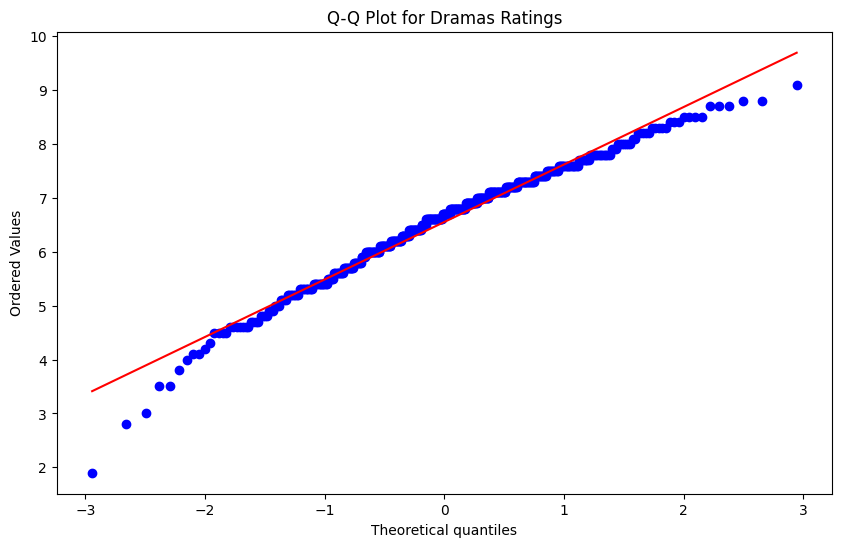

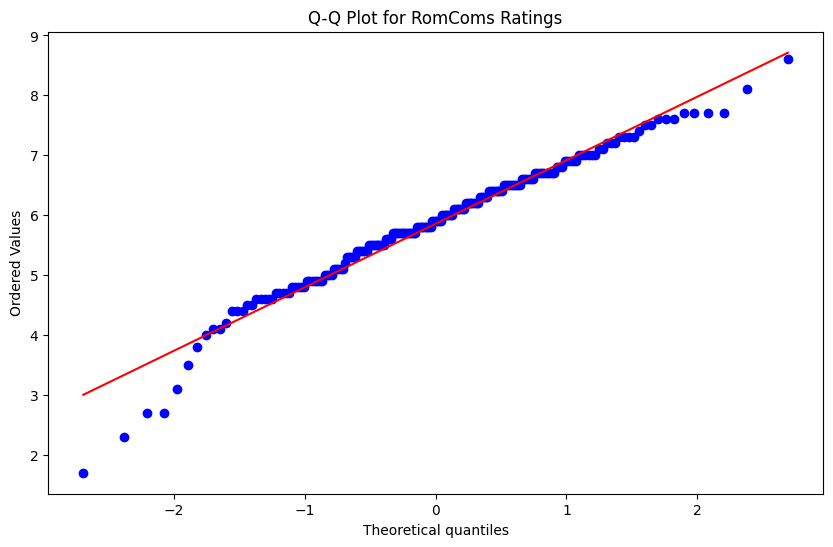

In [22]:

plt.figure(figsize=(10, 6))
stats.probplot(dramas, dist="norm", plot=plt)
plt.title("Q-Q Plot for Dramas Ratings")
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(romcoms, dist="norm", plot=plt)
plt.title("Q-Q Plot for RomComs Ratings")
plt.show()

In [24]:
norm_dramas = stats.shapiro(dramas)
norm_romcoms = stats.shapiro(romcoms)
print(norm_dramas)
print(norm_romcoms)
print(len(dramas), len(romcoms))

ShapiroResult(statistic=0.9793070501814011, pvalue=8.629893467792854e-06)
ShapiroResult(statistic=0.9716790336772209, pvalue=0.0005555837859512374)
428 195


In [29]:
from scipy.stats import  ranksums
W, p_value = ranksums(dramas, romcoms, alternative='greater')
W, p_value

(7.457107358471061, 4.422131900917448e-14)

## Tests for 2 proportions

We will use 'germancredit' credit data.

Is there any basis for the claim that the % of people with a bad credit score is significantly higher among foreign workers?

In [ ]:
import pandas as pd

# URL to the CSV file with credit data
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/credits.csv'

# Load the data from the URL
credits = pd.read_csv(url)

# Display the first few rows of the dataset
print(credits.head())

# Display the column names
print(credits.columns)

   Unnamed: 0               status  duration  \
0           1           ... < 0 DM         6   
1           2    0 <= ... < 200 DM        48   
2           3  no checking account        12   
3           4           ... < 0 DM        42   
4           5           ... < 0 DM        24   

                             credit_history              purpose  amount  \
0   critical account/other credits existing  domestic appliances    1169   
1  existing credits paid back duly till now  domestic appliances    5951   
2   critical account/other credits existing           retraining    2096   
3  existing credits paid back duly till now     radio/television    7882   
4           delay in paying off in the past            car (new)    4870   

                      savings employment_duration  installment_rate  \
0  unknown/no savings account      ... >= 7 years                 4   
1                ... < 100 DM  1 <= ... < 4 years                 2   
2                ... < 100 DM  4 <= ... <

In [ ]:
# Create a contingency table for the variables 'foreign_worker' and 'credit_risk'
contingency_table = pd.crosstab(credits['foreign_worker'], credits['credit_risk'])

# Display the contingency table
print(contingency_table)

credit_risk     bad  good
foreign_worker           
no                4    33
yes             296   667


In [ ]:
import scipy.stats as stats

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test statistic: 5.821575915033861
p-value: 0.015830754902852885
Degrees of freedom: 1
Expected frequencies:
 [[ 11.1  25.9]
 [288.9 674.1]]


In [ ]:
# Interpretation of results
alpha = 0.05
if p < alpha:
    print("There is a significant difference in the percentage of people with a bad credit score among foreign workers.")
else:
    print("There is no significant difference in the percentage of people with a bad credit score among foreign workers.")

There is a significant difference in the percentage of people with a bad credit score among foreign workers.


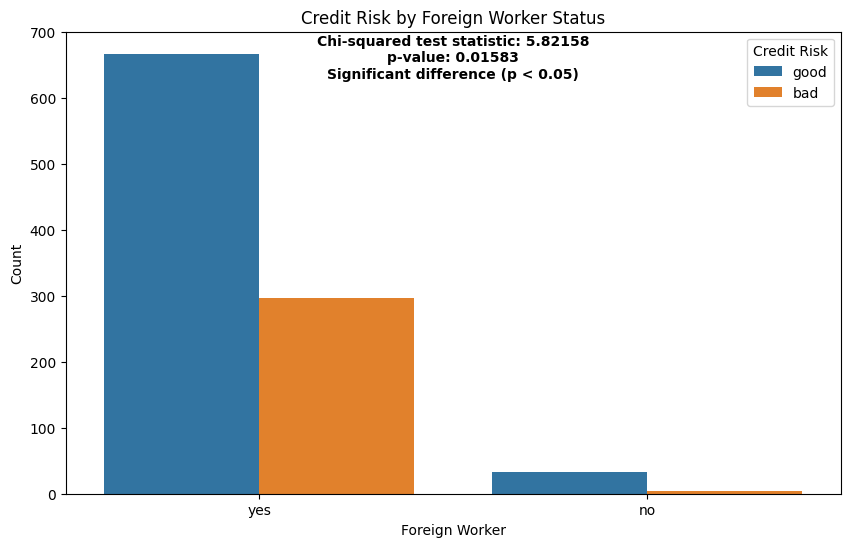

In [ ]:
# Interpretation of results
alpha = 0.05
if p < alpha:
    result_text = "Significant difference (p < 0.05)"
else:
    result_text = "No significant difference (p >= 0.05)"

# Create bar plots for visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for credit risk by foreign worker status
sns.countplot(x='foreign_worker', hue='credit_risk', data=credits, ax=ax)

# Add the chi-squared test results to the plot
plt.text(0.5, max(ax.get_ylim()) * 0.9, f'Chi-squared test statistic: {chi2:.5f}\np-value: {p:.5f}\n{result_text}', 
         horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Credit Risk by Foreign Worker Status')
plt.xlabel('Foreign Worker')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.show()

# Continuity correction remarks

Unlike a number of statistical softwares, ggstatsplot doesn't provide the option for Yates' correction for the Pearson's chi-squared statistic. This is due to compelling amount of Monte-Carlo simulation research which suggests that the Yates' correction is overly conservative, even in small sample sizes. As such it is recommended that it should not ever be applied in practice (Camilli & Hopkins, 1978, 1979; Feinberg, 1980; Larntz, 1978; Thompson, 1988).

The Chi2 test of contingency-difference of proportions (without adjusting for continuity) showed that these differences are statistically significant (p=0.01583). 

We conclude that the level of credit risk is significantly different in domestic and foreign employees -> conclusion: this variable significantly determines risk - it is worth including in the scoring model.

## Paired proportions tests

We are studying the reaction of customers to an advertising campaign of a certain company. We surveyed 195 people, 103 of whom were interested in buying its products. After 6 months of the advertising action, the survey was conducted again. Only 47 people were interested, of which 39 were people who had previously purchased products from the company. Can it be said that the advertising action has a significant impact on the decrease in the number of people interested in the company's products?

In [ ]:
import numpy as np
import pandas as pd

# Create the contingency table
Performance = pd.DataFrame(
    np.array([[39, 64], [8, 84]]),
    index=["Interested before", "Not interested before"],
    columns=["Interested after", "Not interested after"]
)

# Display the contingency table
print(Performance)

                       Interested after  Not interested after
Interested before                    39                    64
Not interested before                 8                    84


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import mcnemar

# Perform the McNemar test
result = mcnemar(Performance, exact=False)

print("McNemar test statistic:", result.statistic)
print("p-value:", result.pvalue)


# Interpretation of results
alpha = 0.05
if result.pvalue < alpha:
    print("\nInterpretation: There is a significant difference between the paired proportions (p < 0.05).")
else:
    print("\nInterpretation: There is no significant difference between the paired proportions (p >= 0.05).")

McNemar test statistic: 37.02564102564103
p-value: 1.1658598093780509e-09

Interpretation: There is a significant difference between the paired proportions (p < 0.05).


Conclusion: We reject the null hypothesis: The advertising campaign had a significant impact on the decrease in the number of people interested in the company's products.

## Challenge 3.

We are using here the Arthritis dataset from the package vcd.
The data represent a double-blind clinical trial of new treatments for rheumatoid arthritis.

In [ ]:
import pandas as pd

# URL to the CSV file with Arthritis data
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/Arthritis.csv'

# Load the data from the URL
Arthritis = pd.read_csv(url)

# Display the first few rows of the dataset
print(Arthritis.head())

   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29     None          no
2           3  77   Treated  Male   30     None          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes


Treatment (Placebo, Treated), Sex (Male, Female), and Improved (None, Some, Marked) are all categorical factors.

Please verify the hypothesis, that the new treatments for rheumatoid arthritis significantly improved the health of patients.

If the test is requested for two paired groups, the mcnemar.test is used.

If the test is requested for more than two paired groups, the test based on Cochran-Mantel-Haenzen for repeated measures is used (powered by mantelhaen.test).

   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29     None          no
2           3  77   Treated  Male   30     None          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes
   Unnamed: 0  ID Treatment   Sex  Age Improved Improvement
0           1  57   Treated  Male   27     Some          no
1           2  46   Treated  Male   29     None          no
2           3  77   Treated  Male   30     None          no
3           4  17   Treated  Male   32   Marked         yes
4           5  36   Treated  Male   46   Marked         yes
Improvement  no  yes
Treatment           
Placebo      36    7
Treated      20   21


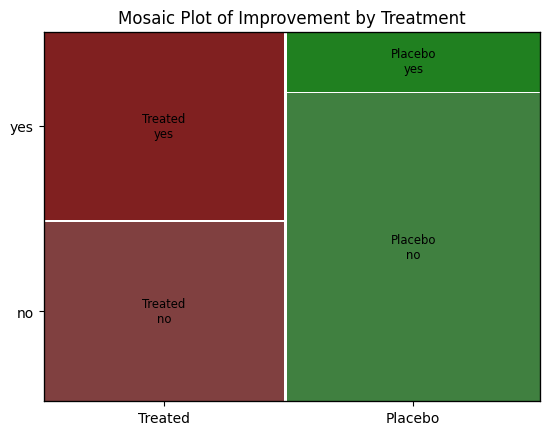

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# URL to the CSV file with Arthritis data
url = 'https://raw.githubusercontent.com/kflisikowski/ds/master/Arthritis.csv'

# Load the data from the URL
Arthritis = pd.read_csv(url)

# Display the first few rows of the dataset
print(Arthritis.head())

# Create a new column 'Improvement' based on the 'Improved' column
Arthritis['Improvement'] = Arthritis['Improved'].apply(lambda x: 'yes' if x == 'Marked' else 'no')

# Display the first few rows of the dataset with the new column
print(Arthritis.head())

# Create a contingency table for the variables 'Treatment' and 'Improvement'
contingency_table = pd.crosstab(Arthritis['Treatment'], Arthritis['Improvement'])

# Display the contingency table
print(contingency_table)

# Create a mosaic plot
mosaic(Arthritis, ['Treatment', 'Improvement'], title='Mosaic Plot of Improvement by Treatment')
plt.show()

In [ ]:
# Import library 
from statsmodels.stats.contingency_tables import mcnemar 

# Create a contingency table for the variables 'Treatment' and 'Improvement'
contingency_table = pd.crosstab(Arthritis['Treatment'], Arthritis['Improvement'])
contingency_matrix = contingency_table.to_numpy()
  
# McNemar's Test with the continuity correction 
print(mcnemar(contingency_matrix, exact=False, correction=True)) 

pvalue      0.020921335337794035
statistic   5.333333333333333


## COCHRAN–MANTEL–HAENSZEL TEST

The mantelhaen.test() function provides a Cochran–Mantel–Haenszel chi-square
test of the null hypothesis that two nominal variables are conditionally independent
in each stratum of a third variable. 

The following code tests the hypothesis that Treatment and Improved variables are independent within each level Sex. The test assumes that there’s no three-way (Treatment x Improved x Sex) interaction.

In [ ]:
# Create a contingency table for the variables 'Treatment', 'Improved', and 'Sex'
mytable = pd.crosstab([Arthritis['Treatment'], Arthritis['Sex']], Arthritis['Improved'])

# Display the contingency table
print(mytable)

Improved          Marked  None  Some
Treatment Sex                       
Placebo   Female       6    19     7
          Male         1    10     0
Treated   Female      16     6     5
          Male         5     7     2


In [ ]:
import statsmodels.api as sm

# Convert the data to the appropriate format for the Mantel-Haenszel test
table = sm.stats.Table(mytable)

# Perform the Mantel-Haenszel test
mh_test = table.test_nominal_association()

print("Mantel-Haenszel test statistic:", mh_test.statistic)
print("p-value:", mh_test.pvalue)

Mantel-Haenszel test statistic: 19.187245654029564
p-value: 0.0038588178819342067


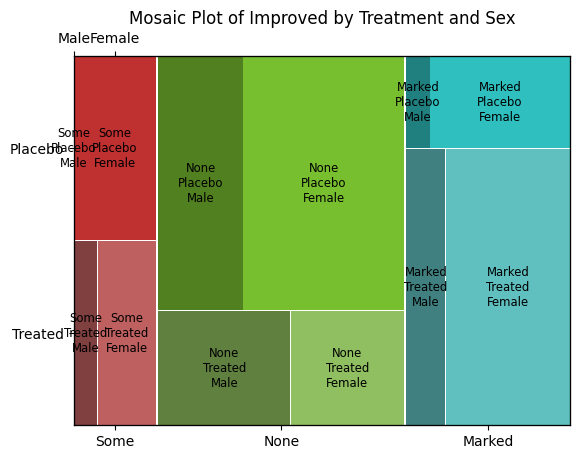

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic(Arthritis, ['Improved', 'Treatment', 'Sex'], title='Mosaic Plot of Improved by Treatment and Sex')
plt.show()

CONCLUSIONS???